# Mathematik für Biologiestudierende II

Sommersemester 2025

06.05.2025

&copy; 2025 Prof. Dr. Rüdiger W. Braun 

In [1]:
import numpy as np
np.set_printoptions(legacy='1.21')
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set_theme()

# Themen

* Alexander-Govern-Test
* Welch-Test
* Python-Funktionen
* Posthoc-Analyse des Alexander-Govern-Tests
* Normalverteilungsannahmen
* Kruskal-Wallis-Test
* Posthoc-Analyse des Kruskal-Wallis-Tests

# Alexander-Govern-Test

### Beispiel: Barsche

Es werden Barsche gleichen Alters verglichen

In [2]:
df = pd.read_csv('barsche.csv')
df.head()

,Art,Länge
0,gestreift,9.890006
1,gestreift,9.343944
2,gestreift,9.867069
3,gestreift,10.302781
4,gestreift,10.066964


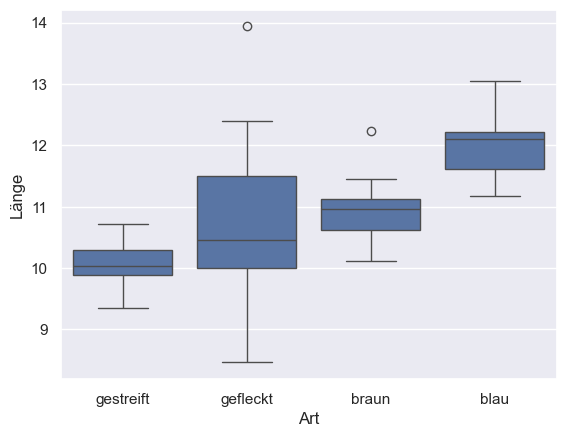

In [3]:
sns.boxplot(df, x="Art", y="Länge");

# Alexander-Govern-Test

Wenn die Daten heteroskedastisch, aber normalverteilt sind, dann rechnet man einen Alexander-Govern-Test

In [4]:
ds = df[df.Art=='gestreift'].Länge
dl = df[df.Art=='gefleckt'].Länge
db = df[df.Art=='blau'].Länge
dr = df[df.Art=='braun'].Länge

In [5]:
stats.alexandergovern(ds, dl, dr, db)

AlexanderGovernResult(statistic=113.40810114676775, pvalue=2.02668339537414e-24)

# Welch-Test

* Der t-Test kann nur gerechnet werden, wenn die Varianzen der zu vergleichenden Datensätze übereinstimmen
* Im heteroskedastischen Fall ist das nicht der Fall
* Man rechnet dann einen Welch-Test
* In scipy ist der Welch-Test wie folgt implementiert

In [6]:
stats.ttest_ind(db, dr, equal_var=False)

TtestResult(statistic=9.647287139857793, pvalue=1.2289650206522807e-13, df=57.645418945809595)

* `equal_var=True`: dann wird ein unverbundener t-Test gerechnet
* `equal_var=False`: dann wird ein Welch-Test gerechnet

* Standardeinstellung ist `equal_var=True`

In [7]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [8]:
muc = MultiComparison(df.Länge, df.Art)

* `muc.allpairtest(stats.ttest_ind)` würde einen t-Test rechnen
* wir können den Schalter `equal_var=False` nicht ohne weiteres übergeben

* wir werden uns ein winziges Programm schreiben

# Python-Funktionen

In [9]:
def quadrat(x):
    return x*x

In [12]:
quadrat(5)

25

* `def`  definiert eine Funktion
* die Rechnungen, welche aus die Funktion besteht, werden eingerückt
* der auf `return` folgende Wert ist das Funktionsergebnis

# Post-hoc Analyse

In [13]:
def welch_test(a, b):
    return stats.ttest_ind(a, b, equal_var=False)

In [14]:
res = muc.allpairtest(welch_test)[0]
res

group1,group2,stat,pval,pval_corr,reject
blau,braun,9.6473,0.0,0.0,True
blau,gefleckt,5.8735,0.0,0.0,True
blau,gestreift,18.752,0.0,0.0,True
braun,gefleckt,0.7068,0.484,1.0,False
braun,gestreift,8.4956,0.0,0.0,True
gefleckt,gestreift,3.3453,0.002,0.012,True


In [15]:
res = muc.allpairtest(welch_test, method='holm')[0]
res

group1,group2,stat,pval,pval_corr,reject
blau,braun,9.6473,0.0,0.0,True
blau,gefleckt,5.8735,0.0,0.0,True
blau,gestreift,18.752,0.0,0.0,True
braun,gefleckt,0.7068,0.484,0.484,False
braun,gestreift,8.4956,0.0,0.0,True
gefleckt,gestreift,3.3453,0.002,0.004,True


# Normalverteilungsannahmen

* Sowohl `f_oneway` als auch `alexandergovern` liefern nur für normalverteilte Daten richtige Ergebnisse
* Normalverteilungsannahmen prüfen wir mit dem Q-Q-Plot

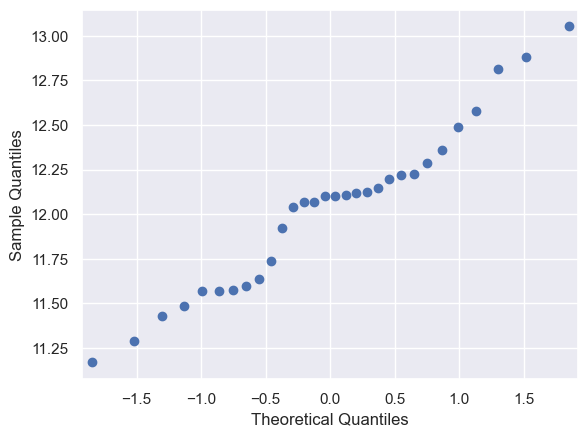

In [16]:
import statsmodels.api as sm
pp = sm.ProbPlot(db)
pp.qqplot();

ausreichende Übereinstimmung

Flügellängen von Libellen in *mm* (erfundene Daten)

In [17]:
df = pd.read_csv('libellen.csv')
df.head()

,Art,Länge
0,graue,4.908840
1,graue,5.016692
2,graue,4.382700
3,graue,4.847548
4,graue,5.523503


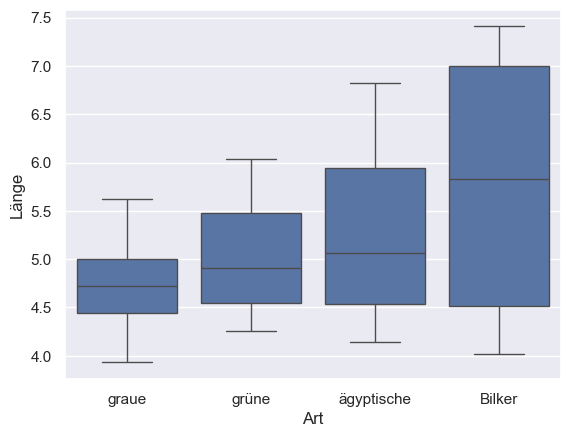

In [18]:
sns.boxplot(df, x="Art", y="Länge");

In [19]:
dg = df[df.Art=='graue'].Länge
du = df[df.Art=='grüne'].Länge
da = df[df.Art=='ägyptische'].Länge
dB = df[df.Art=='Bilker'].Länge

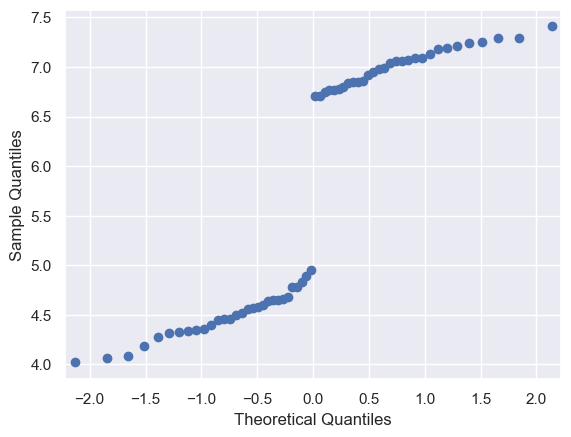

In [20]:
pp = sm.ProbPlot(dB)
pp.qqplot();

nicht normalverteilt

# Kruskal-Wallis-Test

* im Fall nicht normalverteilter Daten rechnet man den Kruskal-Wallis-Test
* dann ist es auch gleichgültig, ob die Daten heteroskedastisch sind

In [21]:
stats.kruskal(dg, du, da, dB)

KruskalResult(statistic=16.028153526970982, pvalue=0.0011190121329907562)

# Post-hoc Analyse

Das nicht-parametrische Analogon zum unverbundenen t-Test ist der Mann-Whitney-Test

In [22]:
muc = MultiComparison(df.Länge, df.Art)

In [24]:
muc.allpairtest(stats.mannwhitneyu, method='holm')

(<class 'statsmodels.iolib.table.SimpleTable'>,
 (array([[2.36000000e+03, 3.31817462e-03],
         [2.16700000e+03, 5.44014641e-02],
         [2.21700000e+03, 2.88113575e-02],
         [1.26000000e+03, 4.63098630e-03],
         [1.25900000e+03, 4.55554070e-03],
         [1.56100000e+03, 2.10642620e-01]]),
  array([ True, False, False,  True,  True, False]),
  array([0.01990905, 0.10880293, 0.08643407, 0.0227777 , 0.0227777 ,
         0.21064262]),
  0.008512444610847103,
  0.008333333333333333),
 array([('Bilker', 'graue', 2360., 0.0033, 0.0199,  True),
        ('Bilker', 'grüne', 2167., 0.0544, 0.1088, False),
        ('Bilker', 'ägyptische', 2217., 0.0288, 0.0864, False),
        ('graue', 'grüne', 1260., 0.0046, 0.0228,  True),
        ('graue', 'ägyptische', 1259., 0.0046, 0.0228,  True),
        ('grüne', 'ägyptische', 1561., 0.2106, 0.2106, False)],
       dtype=[('group1', 'O'), ('group2', 'O'), ('stat', '<f8'), ('pval', '<f8'), ('pval_corr', '<f8'), ('reject', '?')]))

# ANOVA

Übersicht

|Verteilungsannahmen               | Test in `scipy.stats` | Post-hoc-Test        | in `scipy.stats`               |
|:---------------------------------|:----------------------|:---------------------|:-------------------------------|
|normalverteilt, homoskedastisch   | `f_oneway`            | unverbundener t-Test |`ttest_ind`                     |
|normalverteilt, heteroskedastisch | `alexandergovern`     | Welch-Test           |`ttest_ind` mit`equal_var=False`|
|nicht normalverteilt              | `kruskal`             | Mann-Whitney-Test    | `mannwhitneyu`                 |

| Test                 | Art               |
|:---------------------|:------------------|
|t-Test                |parametrisch       |
|Welch-Test            |parametrisch       |
|Mann-Whitney-Test     |nichtparametrisch  |
|ANOVA                 |parametrisch       |
|Alexander-Govern-Test |parametrisch       |
|Kruskal-Wallis-Test   |nichtparametrisch  |

* die parametrischen Tests vergleichen Mittelwerte
* die nichtparametrischen Tests vergleichen Mediane